<a href="https://colab.research.google.com/github/duchaba/Norwegian_Blue_Parrot_k2fa_AI/blob/master/Book_Time_Series_chapter_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4.0 Time Series Book Chapter 4

## 4.1 Setup

In [1]:
#@title Install TSAI package first (MUST "Restart Runtime" after install)
%%capture tsai_log
stable = True # True: stable version in pip, False: latest version from github
if stable: 
    !pip install tsai 
else:      
    !pip install git+https://github.com/timeseriesAI/tsai.git 
## NOTE: REMEMBER TO RESTART (NOT RECONNECT/ RESET) THE KERNEL/ RUNTIME ONCE THE INSTALLATION IS FINISHED

>Ignore the "error" above and remember to "Restart Runtime"

In [1]:
# if failed, be sure to "Restart Runtime" after install above
#
from tsai.all import *
#print(tsai_log)
#computer_setup()
#print ("\n".join(get_UCR_univariate_list()))

In [2]:
import pandas_datareader.data as web
import pandas
import numpy
import matplotlib
import seaborn 
seaborn.set_style('whitegrid')
#@title Setup Time Series Book (Tim)
#
# create class
class TSBook(object):
  #
  # initialize the object
  def __init__(self, name="Wallaby"):
    self.author = "Duc Haba and Oswald Compensato"
    self.name = name
    self._ph()
    self._pp("Hello from", self.__class__.__name__)
    self._pp("Code name", self.name)
    self._pp("Author is", self.author)
    self._ph()
    #
    # color pallete
    self.color_primary = "#ff7900"
    self.color_secondary = "#00c6d7"
    self.color_success = "#cf0072"
    self.color_warning = "#d9e506"
    self.color_base = "#830051"
    self.color_hold = "#766a65"
    self.color_gray80 = "#343a40"
    self.color_gray70 = "#495057"
    self.color_gray40 = "#ced4da"
    self.color_gray20 = "#e9ecef"
    return
  #
  # pretty print output name-value line
  def _pp(self, a, b):
    print("%40s : %s" % (str(a), str(b)))
    return
  #
  # pretty print the header or footer lines
  def _ph(self):
    print("-" * 40, ":", "-" * 40)
    return
  # 
  def _pw(self,a,b):
    if b:
      self._pp("status", a)
    return
  #
  def find_rmse(self,y,yhat):
    e = numpy.sqrt(numpy.mean(numpy.square(y-yhat)))
    return numpy.round(e, 4)
# ---end of D0HZ class
#
# Hack it!
# add_method() is copy from Michael Garod's blog, 
# https://medium.com/@mgarod/dynamically-add-a-method-to-a-class-in-python-c49204b85bd6
# AND correction by: Филя Усков
#
import functools
def add_method(cls):
  def decorator(func):
    @functools.wraps(func) 
    def wrapper(self, *args, **kwargs): 
      return func(self,*args, **kwargs)
    setattr(cls, func.__name__, wrapper)
    return func # returning func means func can still be used normally
  return decorator
#
#
# fixed randomize
@add_method(TSBook)
def random_seed(seed_value=514229, use_cuda=True):
  numpy.random.seed(seed_value) # cpu vars
  torch.manual_seed(seed_value) # cpu  vars
  numpy.random.seed(seed_value) # Python
  if use_cuda: 
    torch.cuda.manual_seed(seed_value)
    torch.cuda.manual_seed_all(seed_value) # gpu vars
    torch.backends.cudnn.deterministic = True  #needed
    torch.backends.cudnn.benchmark = False
  return
#
# That's it.
#
tim = TSBook("Tim")


---------------------------------------- : ----------------------------------------
                              Hello from : TSBook
                               Code name : Tim
                               Author is : Duc Haba and Oswald Compensato
---------------------------------------- : ----------------------------------------


In [3]:
#@title System, GPU, and CPU Info
#
import torch
import pynvml
import gc
import psutil
@add_method(TSBook)
def fetch_gpu_info(self):
  gpu_total = gpu_free = cpu_free = gc_free = 0
  try:
    gc_free = gc.collect()
    torch.cuda.empty_cache()  # 
    val = psutil.virtual_memory()._asdict()
    cpu_free = round((val["available"] / (1024**3)), 2)
    # self.parent.bag.cpu_ram_free = cpu_free
    #
    pynvml.nvmlInit()
    handle = pynvml.nvmlDeviceGetHandleByIndex(0)
    info = pynvml.nvmlDeviceGetMemoryInfo(handle)
    gpu_free = round(info.free / (1024**3), 2)
    # self.parent.bag.gpu_ram_free = gpu_free
    #
    gpu_total = round(info.total / (1024**3), 2)
  except:
    self._ph()
    self._pp("**Error", "NO GPU accelerator")
    self._pp("Suggest recovery", "Menu > Runtime > Change Runtime Type > {select} GPU accelerator")
  return gpu_total, gpu_free, cpu_free, gc_free
#
#
@add_method(TSBook)
def say_gpu_info(self):
  gpu_total, gpu_free, cpu_free, gc_free = self.fetch_gpu_info()
  self._ph()
  print("%40s : %6.2f GB" % ("Total GPU RAM", gpu_total))
  print("%40s : %6.2f GB" % ("Free GPU RAM", gpu_free))
  print("%40s : %6.2f GB" % ("Free CPU RAM", cpu_free))
  print("%40s : %6.2f" % ("Garbage collection recovered", gc_free))
  self._ph()
  return
#
#
import datetime
import sys
import fastai
import psutil
#
@add_method(TSBook)
def say_sys_info(self):
  self._ph()
  now = datetime.datetime.now()
  self._pp("System time", now.strftime("%Y/%m/%d %H:%M"))
  self._pp("Platform", sys.platform)
  #self.parent.bag.platform = sys.platform
  self._pp("Python version", sys.version)
  #self.parent.bag.python_version = sys.version
  self._pp("PyTorch version", torch.__version__)
  #self.parent.bag.pytorch_version = torch.__version__
  self._pp("Fastai version is: ", fastai.__version__)
  #self.parent.bag.fastai_version = fastai.__version__
  # self._pp("Monty version", self.parent.__version__)
  val = psutil.cpu_count()
  self._pp("CPU count", val)
  #self.parent.bag.cpu_count = val
  val = psutil.cpu_freq()
  if (None != val):
    val = val._asdict()
    self._pp("CPU speed", (str(round((val["current"] / 1000), 2)) + " GHz"))
    self._pp("CPU max speed", (str(round((val["max"] / 1000), 2)) + " GHz"))
    #self.parent.bag.cpu_max_ghz = round((val["max"] / 1000), 2)
  else:
    self._pp("*CPU speed", "NOT available")
  self._ph()
  return
#

In [4]:
tim.say_sys_info()

---------------------------------------- : ----------------------------------------
                             System time : 2022/01/06 06:30
                                Platform : linux
                          Python version : 3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]
                         PyTorch version : 1.10.0+cu111
                     Fastai version is:  : 2.5.3
                               CPU count : 4
                              *CPU speed : NOT available
---------------------------------------- : ----------------------------------------


In [5]:
tim.say_gpu_info()

---------------------------------------- : ----------------------------------------
                           Total GPU RAM :  15.90 GB
                            Free GPU RAM :  15.65 GB
                            Free CPU RAM :  23.71 GB
            Garbage collection recovered : 360880.00
---------------------------------------- : ----------------------------------------


>Side note: Mindful of the Python version, import-library version, and the availability of CPU and GPU RAM

## 4.2 Fetch Data

>Side note: The difference between global space and lib space

```
from random import random
import numpy as np
from numpy.random import *
# usage
random()
np.arange(1,100)
```
versus
```
import numpy
#usage
numpy.random.random()
numpy.arange(1,100)
```

Get 3 real-world datasets and one control dataset.
- Apple stocks
- Covid19 infection rate for youth in California
- World climate data from NOAA
- Control dataset, quadratic formular

In [49]:
#title Get real-world datasets
# get noise
import numpy
@add_method(TSBook)
def _fetch_noise(self):
  x = 1 if numpy.random.random() < 0.5 else -1
  y = numpy.random.random() * x * 0.5
  return y 
#
@add_method(TSBook)
def _split_xy(self,orig,horizon,is_reverse=False):
  end = len(orig)
  start = end - horizon
  z = orig.copy()
  if (is_reverse):
    z.sort_index(ascending=True, inplace=True)
  y = pandas.DataFrame(z.iloc[start:end])
  x = pandas.DataFrame(z.iloc[0:start])
  x.columns = ["x-train"]
  y.columns = ["y-validate"]
  return x,y
#
#
@add_method(TSBook)
def _fetch_quad(self,equation, horizon):
  # get the quadratic data
  df = pandas.DataFrame([self._fetch_noise() + (x*x) for x in numpy.arange(1.0,5.0,0.025,dtype=float)])
  self.df4_nonoise = [(x*x) for x in numpy.arange(1.0,5.0,0.025,dtype=float)]
  self.df4_quadratic_x, self.df4_quadratic_y = self._split_xy(orig=df,horizon=horizon)
  return
#
@add_method(TSBook)
def _fetch_stock_price(self, ticker,horizon):
  self.df1_stock_orig = web.DataReader('AAPL', 'stooq')
  self.df1_stock_x, self.df1_stock_y = self._split_xy(orig=self.df1_stock_orig["Close"],horizon=horizon,is_reverse=True)
  return
#
@add_method(TSBook)
def _fetch_covid19(self,ticker,horizon, demog="0-17", uni="total_cases"):
  url = 'https://data.chhs.ca.gov/dataset/f333528b-4d38-4814-bebb-12db1f10f535/resource/e2c6a86b-d269-4ce1-b484-570353265183/download/covid19casesdemographics.csv'
  column = 'demographic_value'
  self.df2_covid19_orig = pandas.read_csv(url, index_col=7)
  self.df2_covid19_orig.index = pandas.to_datetime(self.df2_covid19_orig.index)
  df = pandas.DataFrame(self.df2_covid19_orig.loc[self.df2_covid19_orig[column] == demog][uni])
  self.df2_covid19_youth_x, self.df2_covid19_youth_y = self._split_xy(orig=df,horizon=horizon,is_reverse=False)
  return
#
@add_method(TSBook)
def _fetch_world_climate(self,ticker,horizon):
  url = "https://www.ncdc.noaa.gov/cag/global/time-series/globe/land_ocean/all/11/1880-2021/data.csv"
  self.df3_climate_orig = pandas.read_csv(url, skiprows=4,index_col=0)
  self.df3_climate_orig.index= pandas.to_datetime(self.df3_climate_orig.index,format="%Y%m")
  self.df3_climate_x, self.df3_climate_y = self._split_xy(orig=self.df3_climate_orig,horizon=horizon,is_reverse=False)
  return
# draw datasets 
@add_method(TSBook)
def draw_xy(self,x,y,title="Quadratic Equation",ylabel="",figsize=(9,4),xlabel=None):
  ax1 = x.plot.line(figsize=figsize)
  if (xlabel is None):
    ax2 = y.plot.area(ax=ax1,color="hotpink", alpha=0.5,title=title,ylabel=ylabel)
  else:
    ax2 = y.plot.area(ax=ax1,color="hotpink", alpha=0.5,title=title,ylabel=ylabel,xlabel=xlabel)
  plt.show()
  return ax2
#
# draw datasets line 
@add_method(TSBook)
def draw_xy_line(self,x,y,title="Quadratic Equation",ylabel="",figsize=(9,4),xlabel=None,xcolor="green",ycolor="hotpink",is_reset_index=False):
  if (is_reset_index):
    x1 = x.copy()
    y1 = y.copy()
    x1.reset_index(drop=True,inplace=True)
    y1.reset_index(drop=True,inplace=True)
  else:
    x1 = x
    y1 = y
  ax1 = x1.plot.line(figsize=figsize,color=xcolor)
  if (xlabel is None):
    ax2 = y1.plot.line(ax=ax1,color=ycolor, alpha=0.5,title=title,ylabel=ylabel)
  else:
    ax2 = y1.plot.line(ax=ax1,color=ycolor, alpha=0.5,title=title,ylabel=ylabel,xlabel=xlabel)
  plt.show()
  return ax2
#
# Fetch the four data series
@add_method(TSBook)
def fetch_datasets_4(self,tickers=[{"tick":"APPL", "hor":21}, {"tick":"demographic_value", "hor":31}, {"tick":"climate", "hor":36}, {"tick":"Quadratic","hor":21}]):
  # get apple stock
  self._fetch_stock_price(tickers[0]["tick"],horizon=tickers[0]["hor"])
  # get covid youth data
  self._fetch_covid19(tickers[1]["tick"],horizon=tickers[1]["hor"], demog="0-17", uni="total_cases")
  # get World Noah surface temperature anomalies 
  self._fetch_world_climate(tickers[2]["tick"],horizon=tickers[2]["hor"])
  # get the quadratic data
  self._fetch_quad(equation=tickers[3]["tick"],horizon=tickers[3]["hor"])
  return

In [7]:
# Fetch the data
tim.fetch_datasets_4()

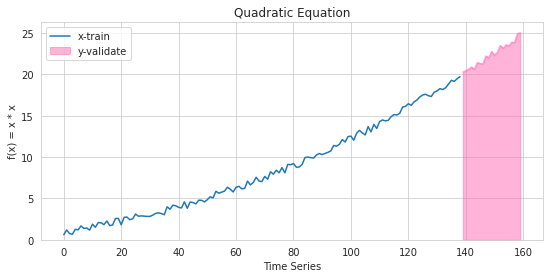

In [8]:
ax = tim.draw_xy(tim.df4_quadratic_x,tim.df4_quadratic_y,ylabel="f(x) = x * x",xlabel="Time Series")

In [9]:
tim.df4_quadratic_x.head()

,x-train
0,0.605326
1,1.191827
2,0.753377
3,0.669271
4,1.266381


Dislay the multivarible dataset

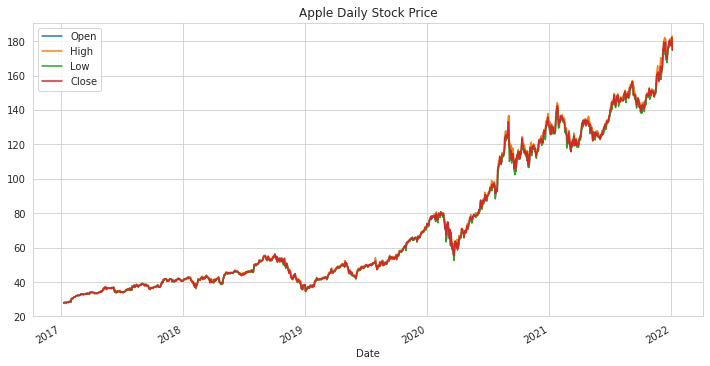

In [10]:
ax = tim.df1_stock_orig.iloc[:, [0,1,2,3]].plot.line(figsize=(12,6),title="Apple Daily Stock Price")

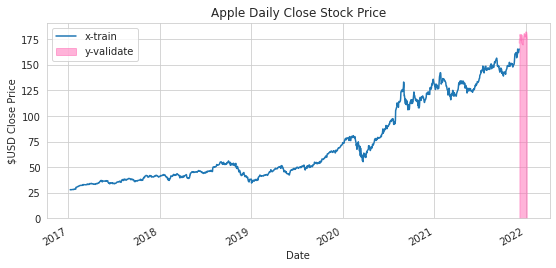

In [11]:
ax = tim.draw_xy(tim.df1_stock_x, tim.df1_stock_y,title="Apple Daily Close Stock Price",ylabel="$USD Close Price")

In [12]:
tim.df1_stock_orig.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-01-05,179.610,180.17,174.64,174.92,94537602
2022-01-04,182.630,182.94,179.12,179.70,99310438
2022-01-03,177.830,182.88,177.71,182.01,104701220
2021-12-31,178.085,179.23,177.26,177.57,64062261
2021-12-30,179.470,180.57,178.09,178.20,59773014


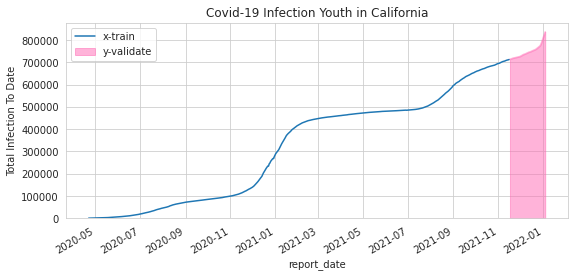

In [13]:
ax = tim.draw_xy(tim.df2_covid19_youth_x, tim.df2_covid19_youth_y,title="Covid-19 Infection Youth in California",ylabel="Total Infection To Date")

In [14]:
tim.df2_covid19_orig.head()

,demographic_category,demographic_value,total_cases,percent_cases,deaths,percent_deaths,percent_of_ca_population
report_date,,,,,,,
2020-04-22,Age Group,0-17,855,2.3,0,0.0,22.5
2020-04-23,Age Group,0-17,936,2.4,0,0.0,22.5
2020-04-24,Age Group,0-17,1011,2.5,0,0.0,22.5
2020-04-25,Age Group,0-17,1039,2.5,0,0.0,22.5
2020-04-26,Age Group,0-17,1085,2.5,0,0.0,22.5


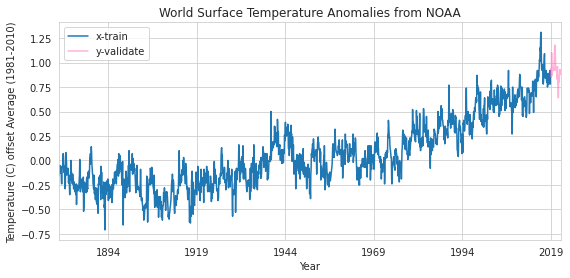

In [15]:
ax = tim.draw_xy_line(tim.df3_climate_x, tim.df3_climate_y,title="World Surface Temperature Anomalies from NOAA",ylabel="Temperature (C) offset Average (1981-2010)")


In [16]:
tim.df3_climate_orig.head()

,Value
Year,
1880-01-01,-0.06
1880-02-01,-0.15
1880-03-01,-0.09
1880-04-01,-0.05
1880-05-01,-0.09


- https://zenodo.org/record/3902690#.YdKmC3PML6Y
- http://tseregression.org/


### 4.1.2 Fetch real world data

>Side note: his website is an ongoing project to develop a comprehensive repository for research into time series classification. If you use the results or code, please cite the paper "Anthony Bagnall, Jason Lines, Aaron Bostrom, James Large and Eamonn Keogh, The Great Time Series Classification Bake Off: a Review and Experimental Evaluation of Recent Algorithmic Advances, Data Mining and Knowledge Discovery, 31(3), 2017". Paper Link, Bibtex Link. We are in the process of updating all the results for the new datasets.

>If you want to just reference the website, please do so as: "Anthony Bagnall, Jason Lines, William Vickers and Eamonn Keogh, The UEA & UCR Time Series Classification Repository, www.timeseriesclassification.com".

>Side note: The earthquake classification problem involves predicting whether a significant event will occur based on the most recent readings in the surrounding area. The data is taken from Northern California Earthquake Data Center, and each data point is an averaged reading for one hour, with the first reading taken on Dec 1st, 1967, the last in 2003.

>More information is on http://www.timeseriesclassification.com/dataset.php

>Side note: There are 134 Univariable dataset available for download. 



- https://timeseriesai.github.io/tsai/data.external.html#get_UCR_data

## 4.3 Forecast/Predict The Time Series Forecasting

### 4.3.1 autoregression (AR)

>Side note: The autoregression (AR) method models the next step in the sequence as a linear function of the observations at prior time steps.

In [17]:
#@title Algorithm Autoregression (AR)
#!pip install statsmodels  #uncomment if you system doesn't have statsmodels preinstall.
import statsmodels
import statsmodels.api
# autoregression (AR) 
@add_method(TSBook)
def predict_ar(self, data, y_true=None,name="Quadratic Line",horizon=0):
  model = statsmodels.api.tsa.ARIMA(data, order=(0, 0, 1))
  model_fit = model.fit()
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end))
  self._ph()
  self._pp("Algorithm", "Autoregression (AR)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " )
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [50]:
yhat = tim.predict_ar(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregression (AR)
                    Time Series Data Set : Quadratic Line, Expected predict value is 
           Root mean square error (RMSE) : 13.8435
                           Predict Value : [13.7293065   8.45589166  8.45589166  8.45589166  8.45589166  8.45589166
  8.45589166  8.45589166  8.45589166  8.45589166  8.45589166  8.45589166
  8.45589166  8.45589166  8.45589166  8.45589166  8.45589166  8.45589166
  8.45589166  8.45589166  8.45589166]
---------------------------------------- : ----------------------------------------


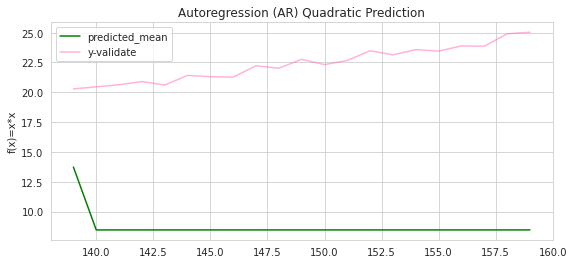

In [51]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="Autoregression (AR) Quadratic Prediction",ylabel="f(x)=x*x")

In [52]:
yhat = tim.predict_ar(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregression (AR)
                    Time Series Data Set : Apple Daily Stock Price, Expected predict value is 
           Root mean square error (RMSE) : 102.343
                           Predict Value : [119.10958529  72.22453809  72.22453809  72.22453809  72.22453809
  72.22453809  72.22453809  72.22453809  72.22453809  72.22453809
  72.22453809  72.22453809  72.22453809  72.22453809  72.22453809
  72.22453809  72.22453809  72.22453809  72.22453809  72.22453809
  72.22453809]
---------------------------------------- : ----------------------------------------


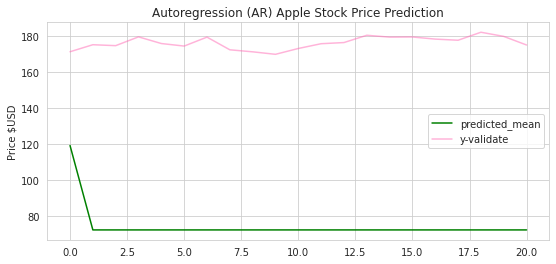

In [53]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="Autoregression (AR) Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [55]:
yhat = tim.predict_ar(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregression (AR)
                    Time Series Data Set : Covid 19 California Youth, Expected predict value is 
           Root mean square error (RMSE) : 441415.7978
                           Predict Value : [510386.74143288 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176 302679.85534176
 302679.85534176 302679.85534176 302679.85534176]
---------------------------------------- : ----------------------------------------


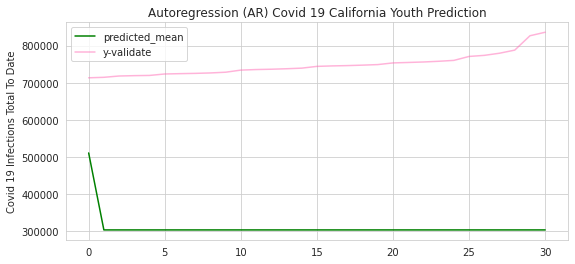

In [56]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="Autoregression (AR) Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [58]:
yhat = tim.predict_ar(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregression (AR)
                    Time Series Data Set : World Climate NOAA, Expected predict value is 
           Root mean square error (RMSE) : 0.8681
                           Predict Value : [0.3215463  0.05910186 0.05910186 0.05910186 0.05910186 0.05910186
 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186
 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186
 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186
 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186
 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186 0.05910186]
---------------------------------------- : ----------------------------------------


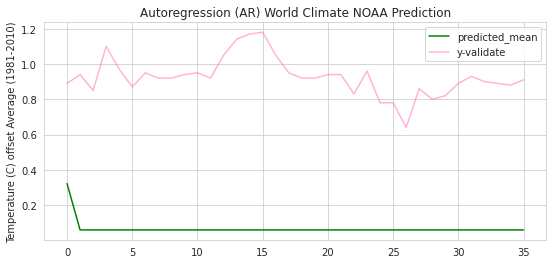

In [59]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="Autoregression (AR) World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.2 Autoregressive Moving Average (ARMA)

>Side note: The Autoregressive Moving Average (ARMA) method models the next step in the sequence as a linear function of the observations and residual errors at previous time steps.
It combines both Autoregression (AR) and Moving Average (MA) models.

In [60]:
#@title Autoregressive Moving Average (ARMA)
@add_method(TSBook)
def predict_arma(self, data, y_true=None,name="Quadratic Line", horizon=0):
  model = statsmodels.api.tsa.ARIMA(data, order=(1, 1, 1))
  model_fit = model.fit()
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end, typ='levels'))
  self._ph()
  self._pp("Algorithm", "Autoregressive Moving Average (ARMA)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " )
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [61]:
yhat = tim.predict_arma(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregressive Moving Average (ARMA)
                    Time Series Data Set : Quadratic Line, Expected predict value is 
           Root mean square error (RMSE) : 3.086
                           Predict Value : [19.63183298 19.66203893 19.65144722 19.6551612  19.65385889 19.65431555
 19.65415542 19.65421157 19.65419188 19.65419878 19.65419636 19.65419721
 19.65419691 19.65419702 19.65419698 19.654197   19.65419699 19.65419699
 19.65419699 19.65419699 19.65419699]
---------------------------------------- : ----------------------------------------


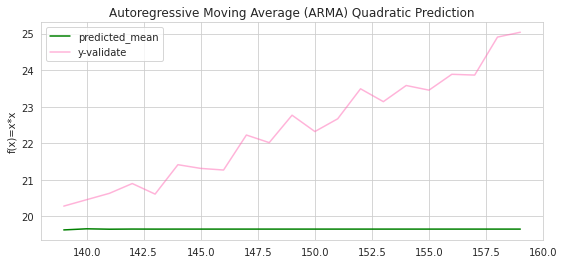

In [62]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="Autoregressive Moving Average (ARMA) Quadratic Prediction",ylabel="f(x)=x*x")

In [65]:
yhat = tim.predict_arma(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregressive Moving Average (ARMA)
                    Time Series Data Set : Apple Daily Stock Price, Expected predict value is 
           Root mean square error (RMSE) : 11.5865
                           Predict Value : [164.94985426 165.10510827 165.03998849 165.06730235 165.05584582
 165.06065115 165.0586356  165.059481   165.05912641 165.05927514
 165.05921275 165.05923892 165.05922794 165.05923255 165.05923062
 165.05923143 165.05923109 165.05923123 165.05923117 165.05923119
 165.05923118]
---------------------------------------- : ----------------------------------------


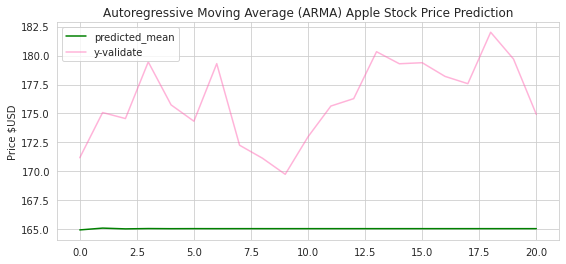

In [66]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="Autoregressive Moving Average (ARMA) Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [67]:
yhat = tim.predict_arma(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregressive Moving Average (ARMA)
                    Time Series Data Set : Covid 19 California Youth, Expected predict value is 
           Root mean square error (RMSE) : 23567.368
                           Predict Value : [713478.37654309 714914.54106062 716343.52958844 717765.37798236
 719180.12191901 720587.79689678 721988.43823667 723382.08108321
 724768.7604053  726148.51099714 727521.36747906 728887.36429841
 730246.53573043 731598.91587908 732944.53867792 734283.43789096
 735615.64711351 736941.19977301 738260.12912986 739572.4682783
 740878.2501472  742177.50750087 743470.27293995 744756.57890216
 746036.45766315 747309.94133729 748577.0618785  749837.85108104
 751092.34058028 752340.56185354 753582.54622087]
---------------------------------------- : ----------------------------------------


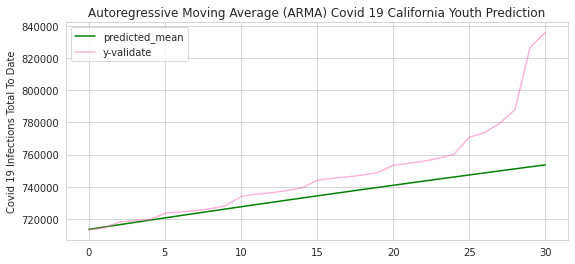

In [68]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="Autoregressive Moving Average (ARMA) Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [69]:
yhat = tim.predict_arma(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Autoregressive Moving Average (ARMA)
                    Time Series Data Set : World Climate NOAA, Expected predict value is 
           Root mean square error (RMSE) : 0.1519
                           Predict Value : [0.80904027 0.8167704  0.81882805 0.81937577 0.81952157 0.81956038
 0.81957071 0.81957346 0.81957419 0.81957439 0.81957444 0.81957445
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446]
---------------------------------------- : ----------------------------------------


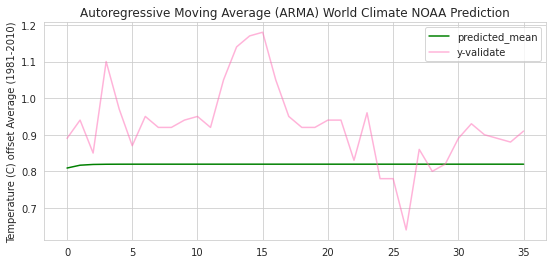

In [70]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="Autoregressive Moving Average (ARMA) World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.3 Seasonal Autoregressive Integrated Moving Average (SARIMA)

>Side note: The Seasonal Autoregressive Integrated Moving Average (SARIMA) method models the next step in the sequence as a linear function of the differenced observations, errors, differenced seasonal observations, and seasonal errors at previous time steps. It combines the ARIMA model to perform the same autoregression, differencing, and moving average modeling at the seasonal level.

In [71]:
#@title Seasonal Autoregressive Integrated Moving Average (SARIMA)
@add_method(TSBook)
def predict_sarima(self, data, y_true=None,name="Quadratic Line",horizon=0):
  model = statsmodels.api.tsa.statespace.SARIMAX(data, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
  model_fit = model.fit(disp=False)
  # make prediction
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end))
  self._ph()
  self._pp("Algorithm", "Seasonal Autoregressive Integrated Moving Average (SARIMA)")
  self._pp("Time Series Data Set", name + ", Expected predict value is ")
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [72]:
yhat = tim.predict_sarima(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Seasonal Autoregressive Integrated Moving Average (SARIMA)
                    Time Series Data Set : Quadratic Line, Expected predict value is 
           Root mean square error (RMSE) : 3.086
                           Predict Value : [19.63183298 19.66203893 19.65144722 19.6551612  19.65385889 19.65431555
 19.65415542 19.65421157 19.65419188 19.65419878 19.65419636 19.65419721
 19.65419691 19.65419702 19.65419698 19.654197   19.65419699 19.65419699
 19.65419699 19.65419699 19.65419699]
---------------------------------------- : ----------------------------------------


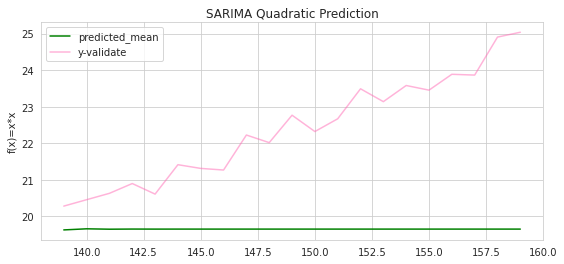

In [73]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="SARIMA Quadratic Prediction",ylabel="f(x)=x*x")

In [74]:
yhat = tim.predict_sarima(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Seasonal Autoregressive Integrated Moving Average (SARIMA)
                    Time Series Data Set : Apple Daily Stock Price, Expected predict value is 
           Root mean square error (RMSE) : 11.5865
                           Predict Value : [164.94985426 165.10510827 165.03998849 165.06730235 165.05584582
 165.06065115 165.0586356  165.059481   165.05912641 165.05927514
 165.05921275 165.05923892 165.05922794 165.05923255 165.05923062
 165.05923143 165.05923109 165.05923123 165.05923117 165.05923119
 165.05923118]
---------------------------------------- : ----------------------------------------


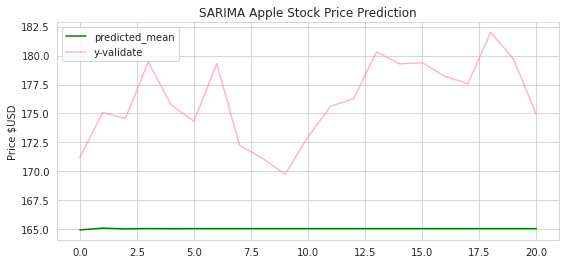

In [75]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="SARIMA Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [76]:
yhat = tim.predict_sarima(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Seasonal Autoregressive Integrated Moving Average (SARIMA)
                    Time Series Data Set : Covid 19 California Youth, Expected predict value is 
           Root mean square error (RMSE) : 23567.368
                           Predict Value : [713478.37654309 714914.54106062 716343.52958844 717765.37798236
 719180.12191901 720587.79689678 721988.43823667 723382.08108321
 724768.7604053  726148.51099714 727521.36747906 728887.36429841
 730246.53573043 731598.91587908 732944.53867792 734283.43789096
 735615.64711351 736941.19977301 738260.12912986 739572.4682783
 740878.2501472  742177.50750087 743470.27293995 744756.57890216
 746036.45766315 747309.94133729 748577.0618785  749837.85108104
 751092.34058028 752340.56185354 753582.54622087]
---------------------------------------- : ----------------------------------------


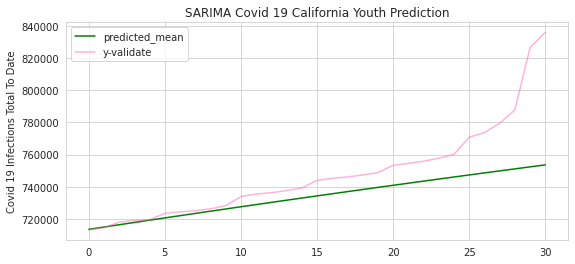

In [77]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="SARIMA Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [78]:
yhat = tim.predict_sarima(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Seasonal Autoregressive Integrated Moving Average (SARIMA)
                    Time Series Data Set : World Climate NOAA, Expected predict value is 
           Root mean square error (RMSE) : 0.1519
                           Predict Value : [0.80904027 0.8167704  0.81882805 0.81937577 0.81952157 0.81956038
 0.81957071 0.81957346 0.81957419 0.81957439 0.81957444 0.81957445
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446
 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446 0.81957446]
---------------------------------------- : ----------------------------------------


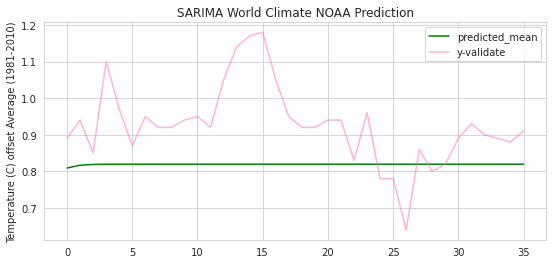

In [79]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="SARIMA World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.4 Simple Exponential Smoothing (SES)

>Side note: The Simple Exponential Smoothing (SES) method models the next step as an exponentially weighted linear function of observations at the previous value. The algorithm is suitable for univariate time series without trend and seasonal components.

In [80]:
#@title Simple Exponential Smoothing (SES) 
@add_method(TSBook)
def predict_ses(self, data, y_true=None,name="Quadratic Line",horizon=0):
  model = statsmodels.tsa.holtwinters.SimpleExpSmoothing(data)
  model_fit = model.fit()
  # make prediction
  start = len(data)
  end = start + horizon
  yhat = pandas.DataFrame(model_fit.predict(start, end))
  self._ph()
  self._pp("Algorithm", "Simple Exponential Smoothing (SES)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " )
  if (y_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(numpy.array(yhat.values[:,0]),numpy.array(y_true.values[:,0])))
  self._pp("Predict Value", yhat.values[:,0])
  self._ph()
  return yhat

In [81]:
yhat = tim.predict_ses(tim.df4_quadratic_x, horizon=len(tim.df4_quadratic_y)-1,name="Quadratic Line",y_true=tim.df4_quadratic_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Simple Exponential Smoothing (SES)
                    Time Series Data Set : Quadratic Line, Expected predict value is 
           Root mean square error (RMSE) : 3.11
                           Predict Value : [19.62694611 19.62694611 19.62694611 19.62694611 19.62694611 19.62694611
 19.62694611 19.62694611 19.62694611 19.62694611 19.62694611 19.62694611
 19.62694611 19.62694611 19.62694611 19.62694611 19.62694611 19.62694611
 19.62694611 19.62694611 19.62694611]
---------------------------------------- : ----------------------------------------


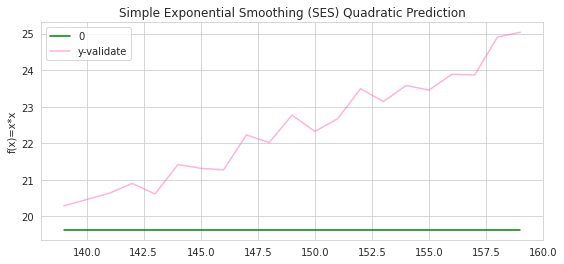

In [82]:
ax=tim.draw_xy_line(yhat,tim.df4_quadratic_y,title="Simple Exponential Smoothing (SES) Quadratic Prediction",ylabel="f(x)=x*x")

In [83]:
yhat = tim.predict_ses(tim.df1_stock_x, horizon=len(tim.df1_stock_y)-1,name="Apple Daily Stock Price",y_true=tim.df1_stock_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Simple Exponential Smoothing (SES)
                    Time Series Data Set : Apple Daily Stock Price, Expected predict value is 
           Root mean square error (RMSE) : 11.6265
                           Predict Value : [165.01604755 165.01604755 165.01604755 165.01604755 165.01604755
 165.01604755 165.01604755 165.01604755 165.01604755 165.01604755
 165.01604755 165.01604755 165.01604755 165.01604755 165.01604755
 165.01604755 165.01604755 165.01604755 165.01604755 165.01604755
 165.01604755]
---------------------------------------- : ----------------------------------------


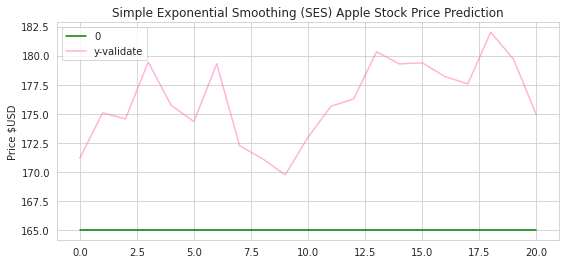

In [84]:
ax=tim.draw_xy_line(yhat,tim.df1_stock_y,title="Simple Exponential Smoothing (SES) Apple Stock Price Prediction",is_reset_index=True,ylabel="Price $USD")

In [86]:
yhat = tim.predict_ses(tim.df2_covid19_youth_x, horizon=len(tim.df2_covid19_youth_y)-1,name="Covid 19 California Youth",y_true=tim.df2_covid19_youth_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Simple Exponential Smoothing (SES)
                    Time Series Data Set : Covid 19 California Youth, Expected predict value is 
           Root mean square error (RMSE) : 46084.4206
                           Predict Value : [712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605 712031.20853605
 712031.20853605 712031.20853605 712031.20853605]
---------------------------------------- : ----------------------------------------


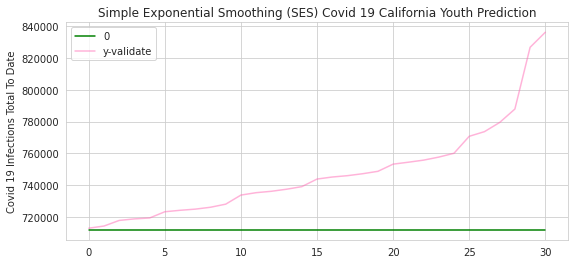

In [87]:
ax=tim.draw_xy_line(yhat,tim.df2_covid19_youth_y,title="Simple Exponential Smoothing (SES) Covid 19 California Youth Prediction",is_reset_index=True,ylabel="Covid 19 Infections Total To Date")

In [88]:
yhat = tim.predict_ses(tim.df3_climate_x, horizon=len(tim.df3_climate_y)-1,name="World Climate NOAA",y_true=tim.df3_climate_y)

---------------------------------------- : ----------------------------------------
                               Algorithm : Simple Exponential Smoothing (SES)
                    Time Series Data Set : World Climate NOAA, Expected predict value is 
           Root mean square error (RMSE) : 0.1493
                           Predict Value : [0.82295627 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627
 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627
 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627
 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627
 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627
 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627 0.82295627]
---------------------------------------- : ----------------------------------------


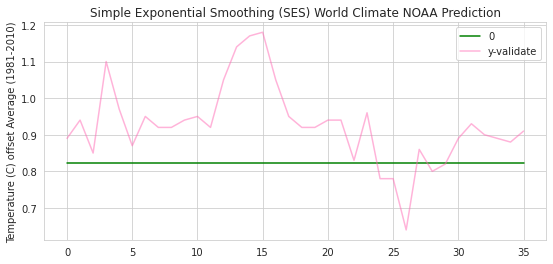

In [89]:
ax=tim.draw_xy_line(yhat,tim.df3_climate_y,title="Simple Exponential Smoothing (SES) World Climate NOAA Prediction",is_reset_index=True,ylabel="Temperature (C) offset Average (1981-2010)")

### 4.3.5 Holt Winter’s Exponential Smoothing (HWES)

>Side note: The Holt Winter’s Exponential Smoothing (HWES), also called the Triple Exponential Smoothing method, models the next step as an exponentially weighted linear function of observations at previous time steps, taking trends seasonality into account. The algorithm is suitable for univariate time series with trend and/or seasonal components.

In [ ]:
#@title Holt Winter’s Exponential Smoothing (HWES) 
@add_method(D0HZ)
def predict_hwes(self, data, yhat_true=None,name="Quadratic Line"):
  model = statsmodels.tsa.holtwinters.ExponentialSmoothing(data)
  model_fit = model.fit()
  # make prediction
  yhat = model_fit.predict(len(data), len(data))
  self._ph()
  self._pp("Algorithm", "Holt Winter’s Exponential Smoothing (HWES)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " + str(yhat_true))
  self._pp("Predict Value", yhat)
  if (yhat_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(yhat,yhat_true))
  self._ph()
  return

In [ ]:
tim.predict_hwes(tim.ts_data_line, yhat_true=16.0,name="Quadratic Line")

---------------------------------------- : ----------------------------------------
                               Algorithm : Holt Winter’s Exponential Smoothing (HWES)
                    Time Series Data Set : Quadratic Line, Expected predict value is 16.0
                           Predict Value : [15.67500662]
           Root mean square error (RMSE) : 0.325
---------------------------------------- : ----------------------------------------


In [ ]:
tim.predict_hwes(tim.x_earthquakes[0][0],name="Earthquakes, first window")

---------------------------------------- : ----------------------------------------
                               Algorithm : Holt Winter’s Exponential Smoothing (HWES)
                    Time Series Data Set : Earthquakes, first window, Expected predict value is None
                           Predict Value : [-0.15884446]
---------------------------------------- : ----------------------------------------


### 4.3.6 Vector Autoregression (VAR)

>Side note: Using an AR model, the Vector Autoregression (VAR) method models the next step in each time series. It is the generalization of AR to multiple parallel time series, e.g., multivariate time series. The algorithm is suitable for multivariate time series without trend and seasonal components.

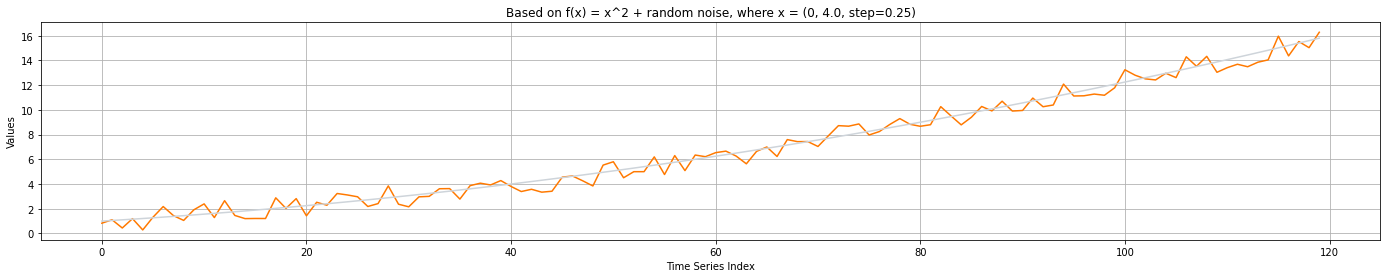

---------------------------------------- : ----------------------------------------
                        Time Series Data : First 4 records


,0
0,0.828900
1,1.106307
2,0.442419
3,1.198044


---------------------------------------- : ----------------------------------------
                        Time Series Data : Last 4 records


,0
116,14.366558
117,15.526083
118,15.031955
119,16.279683


In [ ]:
# fetch sample line data with noise
tim.ts_data_line_2 = tim.fetch_line_ts()

In [ ]:
statsmodels.__version__
# version 0.13.0 is fine. If you have lower then 0.6.0, you should upgrage
#!pip install stasmodels --upgrade    # uncomment if you need to upgrade

'0.13.0'

In [ ]:
#@title Vector Autoregression (VAR) 
@add_method(D0HZ)
def predict_var(self, data1, data2,yhat_true=None,name="Quadratic Line"):
  xdata = list()
  for i in range(len(data1)):
    row = [data1[i], data2[i]]
    xdata.append(row)
  model = statsmodels.tsa.vector_ar.var_model.VAR(xdata)
  model_fit = model.fit()
  # make prediction
  # model_fit.y for version less then 0.6.1
  yhat = model_fit.forecast(model_fit.endog, steps=1)
  self._ph()
  self._pp("Algorithm", "Vector Autoregression (VAR)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " + str(yhat_true))
  self._pp("Predict Value", yhat)
  if (yhat_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(yhat,yhat_true))
  self._ph()
  return

In [ ]:
tim.predict_var(tim.ts_data_line, tim.ts_data_line_2,yhat_true=16.0,name="Quadratic Line")

---------------------------------------- : ----------------------------------------
                               Algorithm : Vector Autoregression (VAR)
                    Time Series Data Set : Quadratic Line, Expected predict value is 16.0
                           Predict Value : [[16.6216669  16.73498432]]
           Root mean square error (RMSE) : 0.6807
---------------------------------------- : ----------------------------------------


In [ ]:
tim.predict_var(tim.x_earthquakes[0][0], tim.x_earthquakes[1][0],name="Earthquakes, first two windows")

---------------------------------------- : ----------------------------------------
                               Algorithm : Vector Autoregression (VAR)
                    Time Series Data Set : Earthquakes, first two windows, Expected predict value is None
                           Predict Value : [[-0.00336738 -0.06269975]]
---------------------------------------- : ----------------------------------------


In [ ]:
tim.predict_var(tim.x_heartbeat[0][0], tim.x_heartbeat[1][0],name="Heartbeat, first two windows")

---------------------------------------- : ----------------------------------------
                               Algorithm : Vector Autoregression (VAR)
                    Time Series Data Set : Heartbeat, first two windows, Expected predict value is None
                           Predict Value : [[0.00124813 0.01044694]]
---------------------------------------- : ----------------------------------------


- https://machinelearningmastery.com/time-series-forecasting-methods-in-python-cheat-sheet/
- https://www.statsmodels.org/stable/generated/statsmodels.tsa.statespace.varmax.VARMAX.html

- https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

- https://medium.com/@oguiza/key-takeaways-from-kaggles-most-recent-time-series-competition-ventilator-pressure-prediction-7a1d2e4e0131

- https://otexts.com/fpp2/nnetar.html

### 4.3.7 Vector Autoregression Moving-Average (VARMA)

>Side note: Using an ARMA model, the Vector Autoregression Moving-Average (VARMA) method models the next step in each time series. It is the generalization of ARMA to multiple parallel time series, e.g., multivariate time series. The algorithm is suitable for multivariate time series without trend and seasonal components.

In [ ]:
#@title Vector Autoregression Moving-Average (VARMA) 
@add_method(D0HZ)
def predict_varma(self, data1, data2,yhat_true=None,name="Quadratic Line"):
  xdata = list()
  for i in range(len(data1)):
    row = [data1[i], data2[i]]
    xdata.append(row)
  model = statsmodels.tsa.statespace.varmax.VARMAX(xdata, order=(1, 1))
  model_fit = model.fit(disp=False)
  # make prediction
  yhat = model_fit.forecast()
  self._ph()
  self._pp("Algorithm", "Vector Autoregression Moving-Average (VARMA)")
  self._pp("Time Series Data Set", name + ", Expected predict value is " + str(yhat_true))
  self._pp("Predict Value", yhat)
  if (yhat_true is not None):
    self._pp("Root mean square error (RMSE)", self.find_rmse(yhat,yhat_true))
  self._ph()
  return

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
tim.predict_varma(tim.ts_data_line, tim.ts_data_line_2,yhat_true=16.0,name="Quadratic Line")

---------------------------------------- : ----------------------------------------
                               Algorithm : Vector Autoregression Moving-Average (VARMA)
                    Time Series Data Set : Quadratic Line, Expected predict value is 16.0
                           Predict Value : [[14.80350495 13.87740827]]
           Root mean square error (RMSE) : 1.7229
---------------------------------------- : ----------------------------------------


In [ ]:
tim.predict_varma(tim.x_earthquakes[0][0], tim.x_earthquakes[1][0],name="Earthquakes, first two windows")

---------------------------------------- : ----------------------------------------
                               Algorithm : Vector Autoregression Moving-Average (VARMA)
                    Time Series Data Set : Earthquakes, first two windows, Expected predict value is None
                           Predict Value : [[ 0.07649963 -0.09307637]]
---------------------------------------- : ----------------------------------------


## 4.4 Using Machine Learning, artifical neural network (ANN)

>Side note: Deep learning is a computer technique to predict results using multiple layers of neural networks. The algorithms expertly solve human speech recognition, natural language processing (NLP), image classification, and collaborative filtering. Each of these layers takes its inputs from previous layers and progressively refines them. The algorithms train each layer to minimize their errors and improve their accuracy. 

>Industries and think tanks are using deep learning across many disciplines. They include but are not limited to medician, physic, social media, commerce, supply chain, finance, and gaming. 

In [ ]:
#@title Fetch real world time series data
# data from http://tseregression.org/
import numpy
import matplotlib
import statsmodels
import pandas
@add_method(D0HZ)
def fetch_tse_data(self,dname,is_split=False):
  if (is_split):
    x,y,z,yt = tsai.data.external.get_Monash_regression_data(dname,split_data=is_split)
  else:
    x,y,z = tsai.data.external.get_Monash_regression_data(dname,split_data=is_split)
  m,n,r = x.shape
  arr = numpy.column_stack((numpy.repeat(numpy.arange(m),n),x.reshape(m*n,-1)))
  df = pandas.DataFrame(arr)
  df = df.drop(0, axis=1) # remove the index column
  self.draw_graph(df.iloc[1],df.iloc[0], title="Time Series from TSE: " + dname + " (first two window/length set)")
  display(df.head(2))
  self.draw_graph(df.iloc[m-1],df.iloc[m-2], title="Time Series from TSE: " + dname + " (last two window/length set)")
  display(df.tail(2))
  if (is_split):
    return x,y,z,yt
  else:
    return x,y,z

>Side Note: The TSE website aims to support research into Time Series Extrinsic Regression (TSER). It is regression research whose aim is to determine the relationship between a time series and a continuous scalar variable. The study is closely related to time series classification (TSC), which aims to discover the relationship between a time series and a categorical class label. We recommend you [read the paper](https://arxiv.org/abs/2006.10996) for a detailed discussion of the datasets and their sources. 

>If you use the results or code, please cite the paper "Chang Wei Tan, Christoph Bergmeir, Francois Petitjean, Geoffrey I. Webb, Time Series Extrinsic Regression: Predicting numeric values from time-series data."

>Side note: The "Appliances Energy" dataset's goal is to predict total energy usage in kWh of a house. This dataset contains 138 time series obtained from the Appliances Energy Prediction dataset from the UCI repository. The time series has 24 dimensions. This includes temperature and humidity measurements of 9 rooms in a house, monitored with a ZigBee wireless sensor network. It also includes weather and climate data such as temperature, pressure, humidity, wind speed, visibility and dewpoint measured from Chievres airport. The data set is averaged for 10 minutes period and spanning 4.5 months.

>Please refer to https://archive.ics.uci.edu/ml/datasets/Appliances+energy+prediction  for more details

119it [00:04, 28.69it/s]
66it [00:01, 36.19it/s]


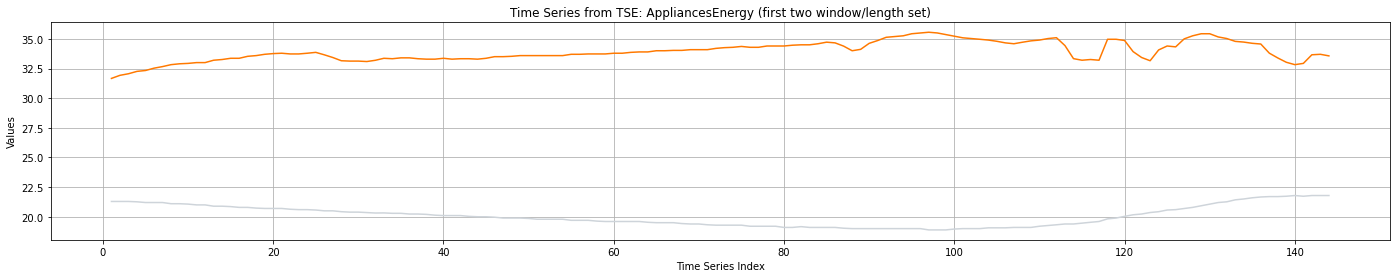

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
0,21.290000,21.290000,21.29,21.26,21.200000,21.20,21.200000,21.100000,21.1,21.066667,21.0,21.0,20.89,20.89,20.856667,20.790000,20.79,20.73,20.7,20.70,20.70,20.633333,20.60,20.60,20.566667,20.500000,20.50,20.426667,20.390000,20.390000,20.356667,20.315,20.323333,20.290000,20.29,20.23,20.230000,20.20,20.133333,20.100000,...,19.066667,19.066667,19.10,19.1000,19.100000,19.2,19.260000,19.323333,19.390000,19.390000,19.463333,19.533333,19.6,19.823333,19.890000,20.033333,20.166667,20.23,20.356667,20.426667,20.566667,20.600000,20.6975,20.79,20.926667,21.066667,21.200000,21.26,21.426667,21.50,21.600000,21.666667,21.700000,21.70,21.730000,21.790000,21.730000,21.79,21.79,21.790000
1,31.666667,31.926667,32.06,32.26,32.333333,32.53,32.663333,32.826667,32.9,32.933333,33.0,33.0,33.20,33.26,33.363333,33.363333,33.53,33.59,33.7,33.76,33.79,33.730000,33.73,33.79,33.863333,33.656667,33.43,33.156667,33.126667,33.126667,33.090000,33.195,33.363333,33.326667,33.40,33.40,33.326667,33.29,33.290000,33.363333,...,34.796667,34.663333,34.59,34.7175,34.833333,34.9,35.026667,35.100000,34.433333,33.333333,33.200000,33.260000,33.2,34.966667,34.966667,34.866667,33.926667,33.43,33.156667,34.066667,34.400000,34.326667,35.0000,35.26,35.433333,35.433333,35.163333,35.03,34.790000,34.73,34.626667,34.566667,33.796667,33.39,33.026667,32.826667,32.933333,33.66,33.70,33.566667


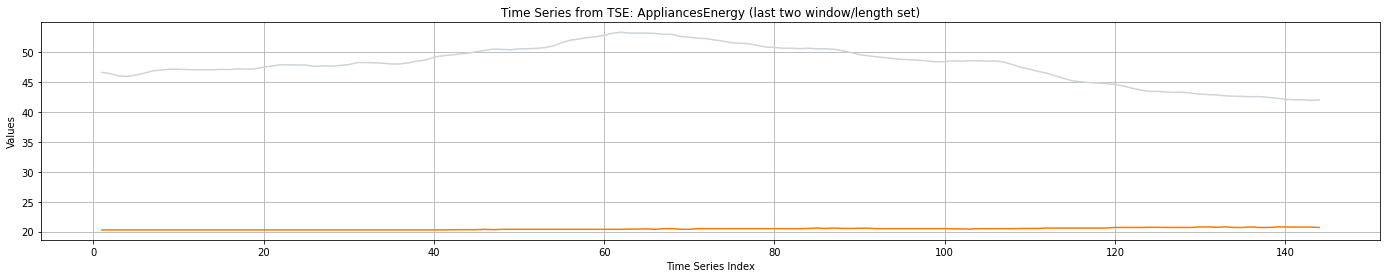

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144
3286,40.0,40.0,40.0,40.0,40.0,40.0,40.0,38.166667,36.333333,34.50,32.666667,30.833333,29.0,28.833333,28.666667,28.50,28.333333,28.166667,28.0,28.166667,28.333333,28.50,28.666667,28.833333,29.0,29.000000,29.000000,29.0,29.000000,29.000000,29.0,29.00,29.0,29.00,29.0,29.00,29.0,29.000000,29.000000,29.00,...,28.333333,28.50,28.666667,28.833333,29.0,28.333333,27.666667,27.00,26.333333,25.666667,25.0,27.50,30.0,32.50,35.0,37.50,40.0,38.000000,36.000000,34.00,32.000000,30.000000,28.0,30.00,32.0,34.00,36.0,38.00,40.0,40.0,40.0,40.0,40.0,40.0,40.0,37.833333,35.666667,33.50,31.333333,29.166667
3287,7.8,7.8,7.8,7.8,7.8,7.8,7.8,7.650000,7.500000,7.35,7.200000,7.050000,6.9,6.950000,7.000000,7.05,7.100000,7.150000,7.2,7.016667,6.833333,6.65,6.466667,6.283333,6.1,5.966667,5.833333,5.7,5.566667,5.433333,5.3,5.45,5.6,5.75,5.9,6.05,6.2,6.183333,6.166667,6.15,...,5.900000,5.75,5.600000,5.450000,5.3,5.483333,5.666667,5.85,6.033333,6.216667,6.4,6.55,6.7,6.85,7.0,7.15,7.3,7.116667,6.933333,6.75,6.566667,6.383333,6.2,6.25,6.3,6.35,6.4,6.45,6.5,6.6,6.7,6.8,6.9,7.0,7.1,6.883333,6.666667,6.45,6.233333,6.016667


In [ ]:
tim.x_appliances, tim.y_appliances, tim_split_appliances = tim.fetch_tse_data("AppliancesEnergy")

>Side note: The Covid-19 dataset's goal is to predict COVID-19's death rate on 1st April 2020 for each country using daily confirmed cases for the last three months. This dataset contains 201 time series, where each time series is the daily confirmed cases for a country. The data was obtained from WHO's COVID-19 database.

>Please refer to https://covid19.who.int/ for more details

153it [00:00, 9126.35it/s]
74it [00:00, 8206.30it/s]


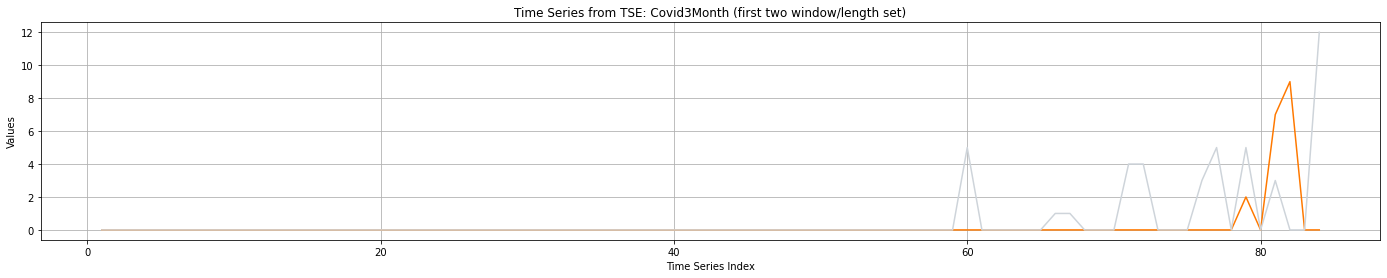

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,12.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,9.0,0.0,0.0


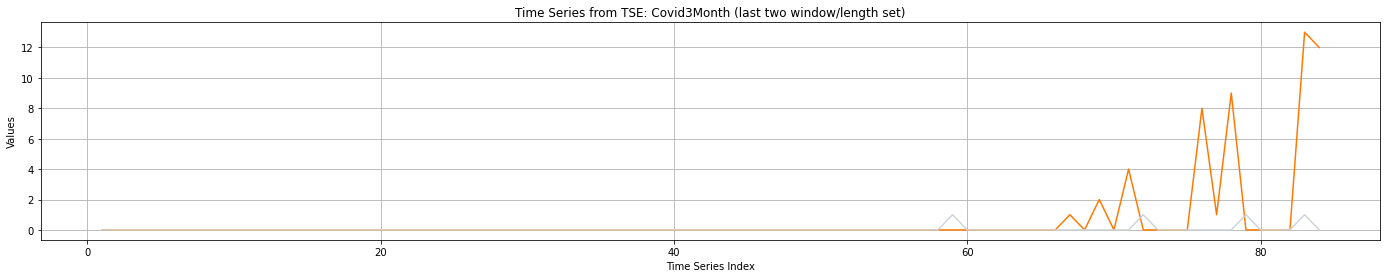

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,4.0,0.0,0.0,0.0,0.0,8.0,1.0,9.0,0.0,0.0,0.0,0.0,13.0,12.0


In [ ]:
tim.x_covid19, tim.y_covid19, tim.split_covid19 = tim.fetch_tse_data("Covid3Month")

###4.4.1 SKLearn

>Side note: The scikit-learn project started as scikits.learn, a Google Summer of Code project by David Cournapeau. Its name stems from the notion that it is a "SciKit" (SciPy Toolkit), a separately developed and distributed third-party extension to SciPy.[4] Other developers later rewrote the original codebase. In 2010 Fabian Pedregosa, Gael Varoquaux, Alexandre Gramfort, and Vincent Michel, all from the French Institute for Research in Computer Science and Automation in Rocquencourt, France, took leadership of the project made the first public release on February the 1st 2010.[5] Of the various scikits, scikit-learn and scikit-image were described as "well-maintained and popular" in November 2012.[6] Scikit-learn is one of the most popular machine learning libraries on GitHub.[7]

>https://scikit-learn.org/stable/#

153it [00:00, 5010.06it/s]
74it [00:00, 4171.19it/s]


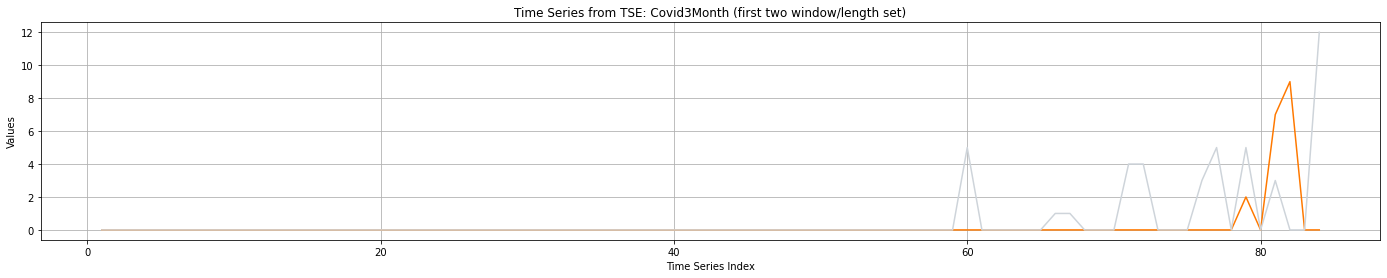

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,0.0,3.0,5.0,0.0,5.0,0.0,3.0,0.0,0.0,12.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.0,9.0,0.0,0.0


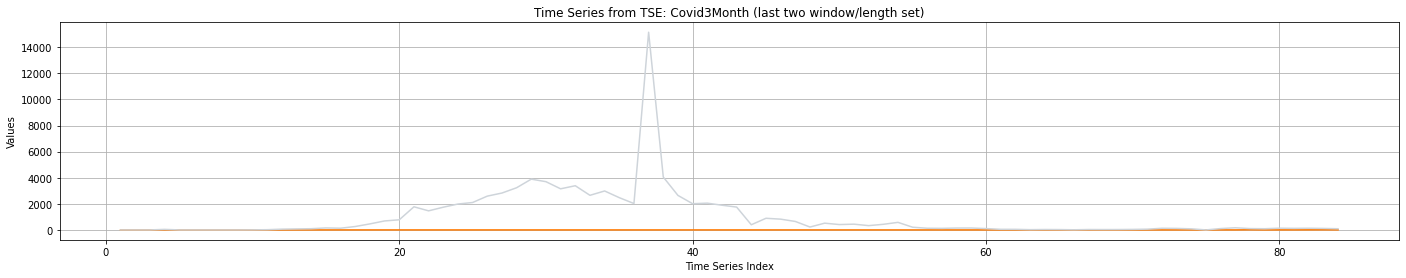

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84
138,0.0,0.0,0.0,41.0,0.0,0.0,0.0,0.0,0.0,4.0,17.0,59.0,77.0,93.0,152.0,131.0,261.0,462.0,688.0,776.0,1772.0,1462.0,1741.0,1984.0,2101.0,2590.0,2827.0,3233.0,3892.0,3697.0,3151.0,3387.0,2653.0,2985.0,2472.0,2022.0,15152.0,4050.0,2644.0,2008.0,...,892.0,825.0,649.0,221.0,517.0,411.0,440.0,329.0,430.0,579.0,206.0,128.0,120.0,143.0,146.0,102.0,46.0,45.0,20.0,31.0,26.0,10.0,30.0,27.0,29.0,39.0,58.0,126.0,116.0,82.0,1.0,104.0,164.0,102.0,92.0,132.0,120.0,128.0,114.0,90.0
139,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,9.0,0.0,1.0,2.0,4.0,7.0,5.0


In [ ]:
tim.xt_covid19, tim.yt_covid19, tim.xv_covid19, tim.yv_covid19 = tim.fetch_tse_data("Covid3Month",is_split=True)

In [ ]:
#@title The scikit-learn
import sklearn
import sklearn.metrics
import tsai
import tsai.models
@add_method(D0HZ)
def predict_sklearn(self, xt, yt,xv,yv,name="Covid-19"):
  #
  sk_mse = sklearn.metrics._scorer.make_scorer(sklearn.metrics.mean_squared_error, greater_is_better=False)
  learn = tsai.models.MINIROCKET.MiniRocketRegressor(scoring=sk_mse)
  learn.fit(xt,yt)
  y_hat = learn.predict(xv)
  loss_rate = sklearn.metrics.mean_squared_error(yv,y_hat, squared=False)
  #
  self._ph()
  self._pp("Framework", "Scikit-Learn (SKLearn)")
  self._pp("Time Series Data Set", name )
  self._pp("Final Loss Rate (RMSE)", round(loss_rate,6))
  self._ph()
  return 

In [ ]:
tim.predict_sklearn(tim.xt_covid19,tim.yt_covid19,tim.xv_covid19,tim.yv_covid19,name="Covid-19")

---------------------------------------- : ----------------------------------------
                               Framework : Scikit-Learn (SKLearn)
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : 0.041632
---------------------------------------- : ----------------------------------------


### 4.4.2 Long short-term memory (LSTM)

>Side Note: Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture[1] used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process single data points (such as images) and entire sequences of data (such as speech or video). For example, LSTM applies to tasks such as unsegmented, connected handwriting recognition,[2] speech recognition[3][4], and anomaly detection in network traffic or IDSs (intrusion detection systems).

>A standard LSTM unit comprises a cell, an input gate, an output gate, and a forget gate. The cell remembers values over arbitrary time intervals, and the three gates regulate the flow of information into and out of the cell.

>LSTM networks are well-suited for classifying, processing, and making predictions based on time series data. There can be lags of unknown duration between significant events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models, and other sequence learning methods in numerous applications.

- https://link.springer.com/article/10.1007%2Fs00477-020-01776-2

- https://ieeexplore.ieee.org/abstract/document/9112272

In [ ]:
#@title Artificial Neural Network
import fastai
import tsai
import tsai.models
@add_method(D0HZ)
def predict_ann(self, x,y,spl,mod,xname="Covid-19",epoch=50):
  #
  self._ph()
  self._pp("Framework", "Fast.ai & TSAI")
  self._pp("Algorithm", str(mod))
  self._pp("Time Series Data Set", xname )
  self._pp("Final Loss Rate (RMSE)", "[see below]")
  self._ph()

  tfms  = [None, [tsai.data.core.TSRegression()]]
  btfms = tsai.data.preprocessing.TSStandardize(by_sample=True, by_var=True)
  dls = tsai.data.core.get_ts_dls(x, y, splits=spl, tfms=tfms, batch_tfms=btfms)
  learn = tsai.learner.ts_learner(dls, mod, 
    metrics=[tsai.metrics.mae, fastai.metrics.rmse], cbs=tsai.callback.core.ShowGraph())
  lr = learn.lr_find()
  learn.fit_one_cycle(epoch, lr.valley)
  return learn

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.RNN.LSTM'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.004249,0.004928,0.052354,0.070198,00:00
1,0.004109,0.004327,0.046734,0.065782,00:00
2,0.003985,0.003464,0.038333,0.058854,00:00
3,0.003531,0.002534,0.032813,0.050336,00:00
4,0.003198,0.001960,0.032402,0.044269,00:00
5,0.002951,0.002114,0.038456,0.045976,00:00
6,0.002838,0.002552,0.044668,0.050518,00:00
7,0.002821,0.002400,0.043124,0.048986,00:00
8,0.002759,0.001904,0.035280,0.043631,00:00
9,0.002647,0.001988,0.030696,0.044589,00:00


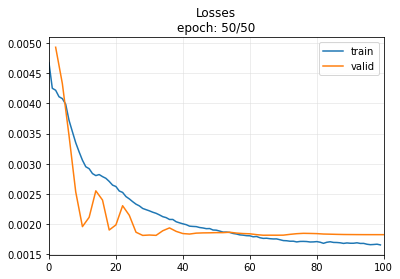

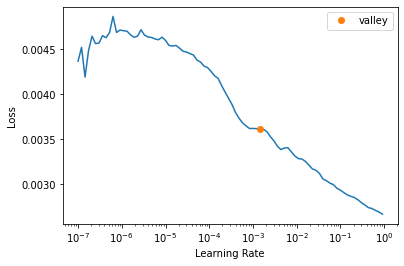

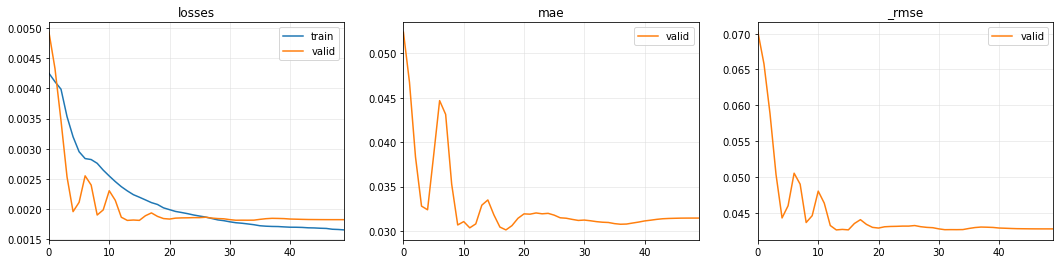

In [ ]:
tim.learn_lstm=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.RNN.LSTM,xname="Covid-19")

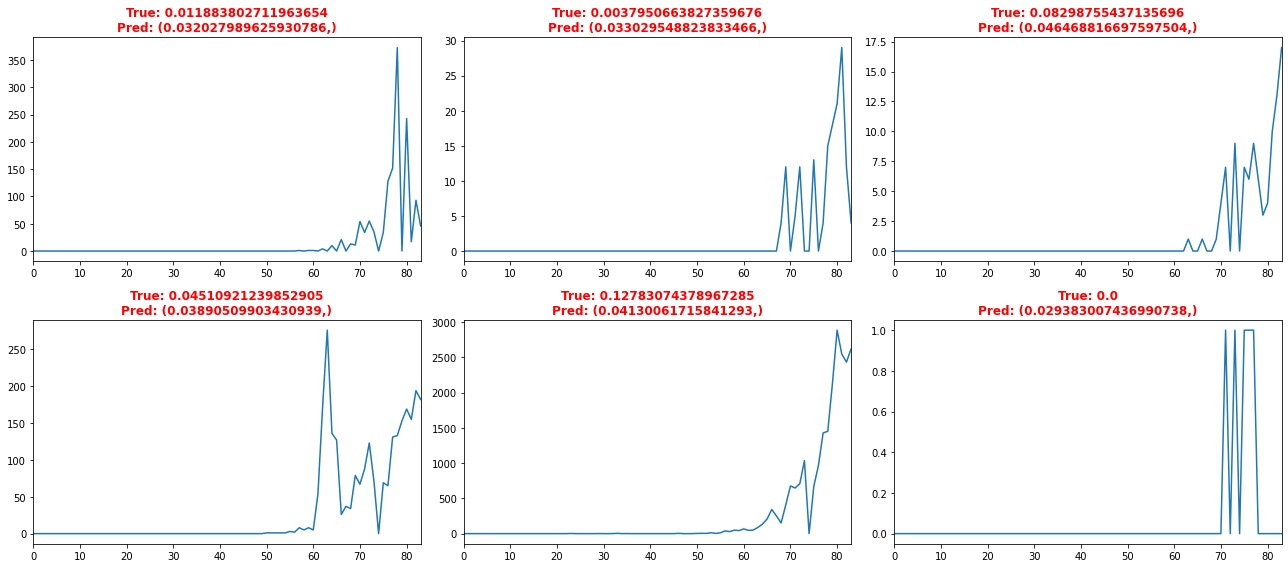

In [ ]:
tim.learn_lstm.show_results(max_n=6)

### 4.4.3 InceptionTime

>Side note: InceptionTime: Finding AlexNet for Time Series Classification. The paper brings deep learning to the forefront of research into Time Series Classification (TSC). TSC is the area of machine learning tasked with the categorization (or labeling) of time series. The last few decades of work in this area have led to significant progress in the accuracy of classifiers, with state-of-the-art now represented by the HIVE-COTE algorithm. While extremely accurate, HIVE-COTE cannot be applied to many real-world datasets because its high training time complexity is O(N2 * T4) for a dataset with N time series of length T.

- https://arxiv.org/abs/1909.04939

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.InceptionTime.InceptionTime'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.242211,0.020909,0.137380,0.144599,00:00
1,0.236520,0.024045,0.148323,0.155065,00:00
2,0.227827,0.026888,0.157629,0.163974,00:00
3,0.214380,0.028951,0.164095,0.170151,00:00
4,0.197639,0.030274,0.168105,0.173994,00:00
5,0.178630,0.030839,0.169752,0.175610,00:00
6,0.158575,0.030902,0.169910,0.175791,00:00
7,0.139168,0.030630,0.169079,0.175015,00:00
8,0.121952,0.029324,0.165149,0.171241,00:00
9,0.107860,0.026602,0.156682,0.163100,00:00


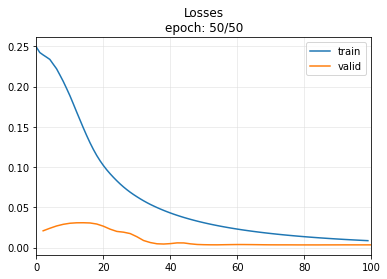

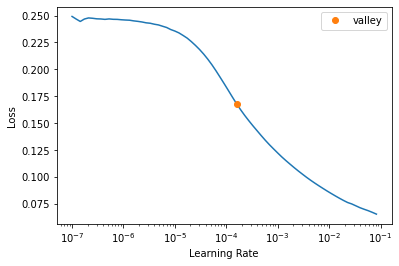

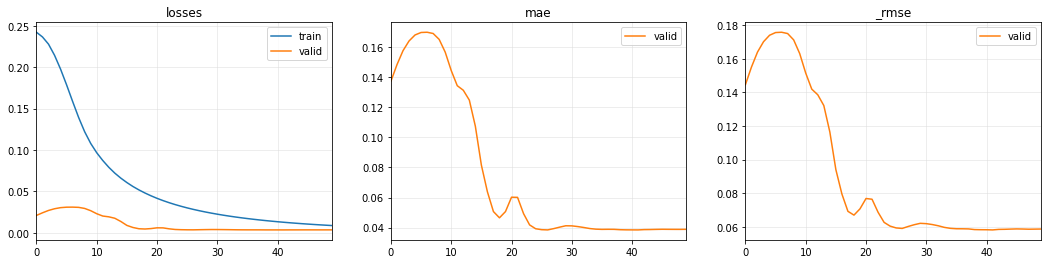

In [ ]:
tim.learn_itime=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.InceptionTime.InceptionTime,xname="Covid-19")

###4.4.4 ResNet

>Side note: Time Series Classification (TSC) received wide attention in machine learning and data mining and arose in various fields, such as scheduling, logistics, medical and health, and more. How to overcome the noise in the time series datasets is one of the critical challenges of the TSC. In this paper, we propose a hybrid Residual Network (ResNet) with a genetic algorithm-based network structure optimization for robust TSC, named GA-ResNet. Although network structure optimization is one of the key ways to obtain an effective deep neural network model, this structure optimization is an NP-hard problem. We design a genetic algorithm for the ResNet structure optimization. Several benchmarks are adopted to prove the effectiveness of the proposed GA-ResNet compared with six state-of-the-art deep neural networks.

- https://ieeexplore.ieee.org/abstract/document/8965287

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.ResNet.ResNet'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.040999,0.004903,0.053020,0.070022,00:00
1,0.038046,0.003452,0.043203,0.058753,00:00
2,0.034579,0.002945,0.039718,0.054268,00:00
3,0.030069,0.002911,0.040967,0.053954,00:00
4,0.025294,0.003603,0.047827,0.060022,00:00
5,0.021335,0.005289,0.061568,0.072725,00:00
6,0.019070,0.007629,0.075884,0.087344,00:00
7,0.017869,0.009181,0.084524,0.095817,00:00
8,0.016454,0.008899,0.083159,0.094336,00:00
9,0.014770,0.007235,0.074500,0.085060,00:00


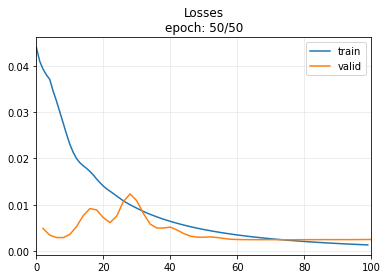

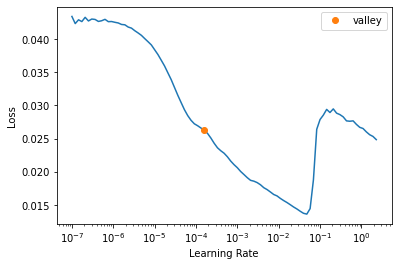

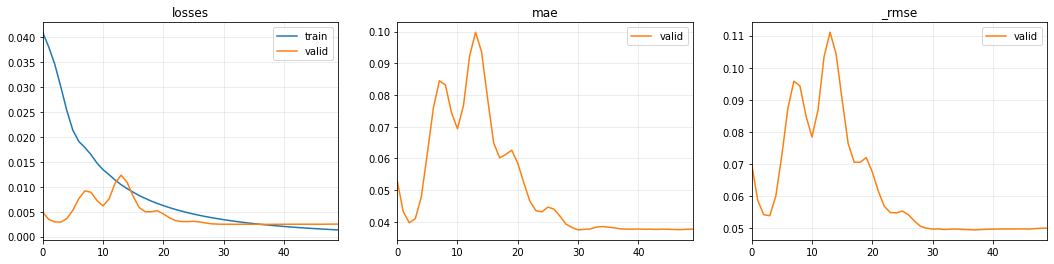

In [ ]:
tim.learn_resnet=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.ResNet.ResNet,xname="Covid-19")

###4.4.5 Fully Convolutional Network (FCN)

>Side note: Convolutional networks are powerful visual models that
yield hierarchies of features. We show that convolutional networks by themselves, trained end-to-end, pixelsto pixels, exceed the state-of-the-art in semantic segmentation. Our critical insight is to build “fully convolutional” networks that take input of the arbitrary size and produce
correspondingly-sized output with efficient inference and learning. We define and detail the space of fully convolutional networks, explain their application to spatially dense prediction tasks, and draw connections to prior models.

- https://arxiv.org/pdf/1411.4038.pdf

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.FCN.FCN'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.032194,0.003061,0.038283,0.055329,00:00
1,0.030549,0.004692,0.052085,0.068495,00:00
2,0.029094,0.005443,0.055977,0.073780,00:00
3,0.027358,0.005514,0.055977,0.074255,00:00
4,0.025018,0.005326,0.053265,0.072978,00:00
5,0.022372,0.004345,0.044217,0.065915,00:00
6,0.019715,0.003172,0.037144,0.056321,00:00
7,0.017370,0.003413,0.048492,0.058423,00:00
8,0.015450,0.006194,0.067902,0.078699,00:00
9,0.013971,0.009229,0.083845,0.096069,00:00


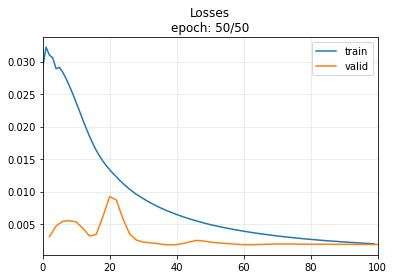

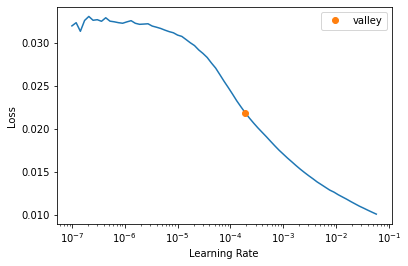

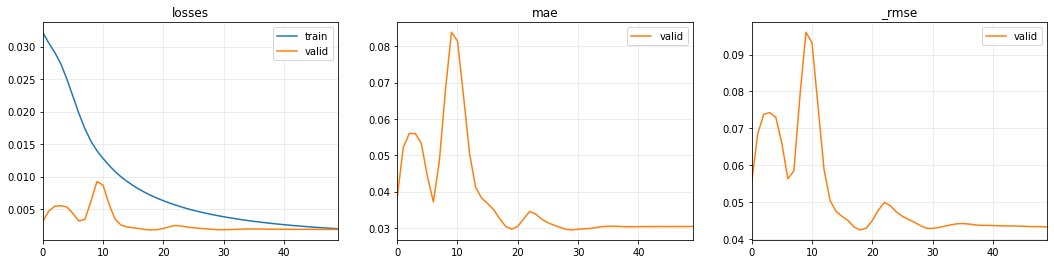

In [ ]:
tim.learn_fcn=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.FCN.FCN,xname="Covid-19")

###4.4.6 MiniRocket

>Side note, Until recently, the most accurate methods for time series classification were limited by high computational complexity. ROCKET achieves state-of-the-art accuracy with a fraction of the computational expense of most existing methods by transforming input time series using random convolutional kernels and using the transformed features to train a linear classifier. We reformulate ROCKET into a new method, MINIROCKET, making it up to 75 times faster on larger datasets and almost deterministic.  Optionally, with additional computational expense, fully deterministic), while maintaining essentially the same accuracy. Using this method, it is possible to train and test a classifier on all 109 datasets from the UCR archive to state-of-the-art accuracy in less than 10 minutes. MINIROCKET is significantly faster than any other method of comparable accuracy (including ROCKET) and substantially more accurate than any other method of even roughly similar computational expense. As such, we suggest that MINIROCKET should now be considered and used as the default variant of ROCKET.

- https://arxiv.org/abs/2012.08791

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.MINIROCKET_Pytorch.MiniRocket'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.003107,0.003502,0.039448,0.059178,00:00
1,0.002960,0.003472,0.039261,0.058920,00:00
2,0.002865,0.003381,0.038728,0.058148,00:00
3,0.002841,0.003286,0.038191,0.057319,00:00
4,0.002844,0.003196,0.038096,0.056534,00:00
5,0.002803,0.003220,0.038602,0.056747,00:00
6,0.002740,0.003121,0.038235,0.055862,00:00
7,0.002700,0.003043,0.038008,0.055166,00:00
8,0.002629,0.002960,0.037412,0.054409,00:00
9,0.002561,0.002977,0.038248,0.054558,00:00


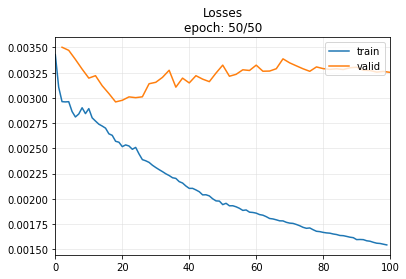

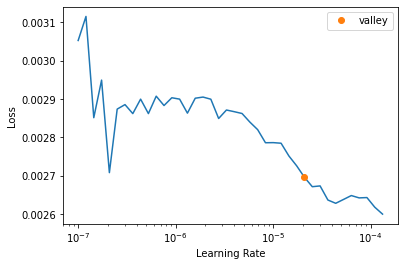

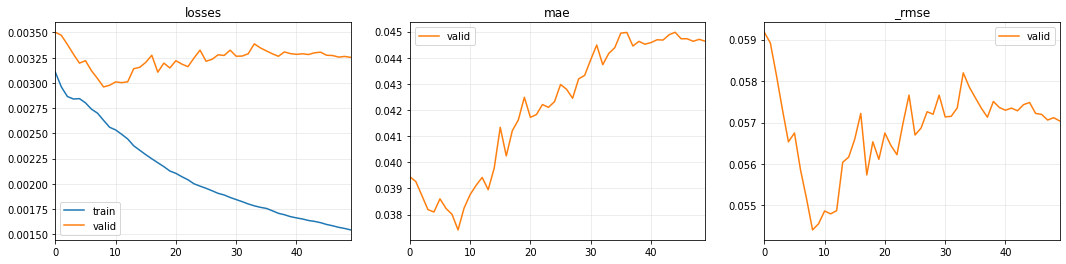

In [ ]:
tim.learn_rocket=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.MINIROCKET_Pytorch.MiniRocket,xname="Covid-19")

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.MINIROCKET_Pytorch.MiniRocket'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.002757,0.003535,0.039591,0.059452,00:00
1,0.002845,0.003504,0.039331,0.059192,00:00
2,0.002802,0.003448,0.039001,0.058721,00:00
3,0.002840,0.003337,0.038342,0.057769,00:00
4,0.002805,0.003274,0.038194,0.057215,00:00
5,0.002799,0.003268,0.038601,0.057167,00:00
6,0.002754,0.003290,0.039089,0.057358,00:00
7,0.002737,0.003276,0.039425,0.057236,00:00
8,0.002683,0.003231,0.039185,0.056839,00:00
9,0.002617,0.003124,0.038784,0.055896,00:00


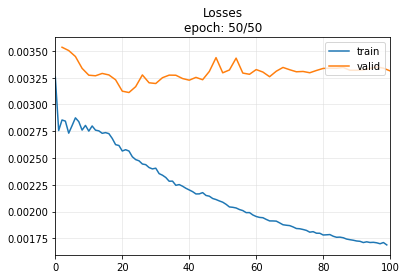

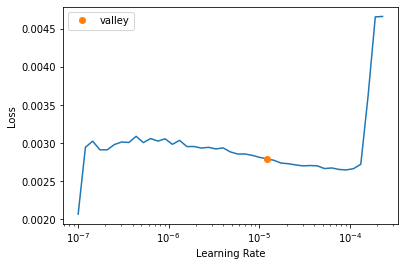

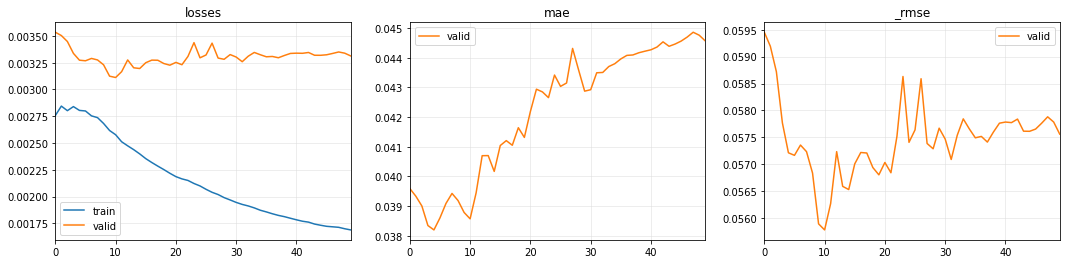

In [ ]:
tim.learn_rocket=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.MINIROCKET_Pytorch.MiniRocket,xname="Covid-19")

---------------------------------------- : ----------------------------------------
                               Framework : Fast.ai & TSAI
                               Algorithm : <class 'tsai.models.MINIROCKET_Pytorch.MiniRocket'>
                    Time Series Data Set : Covid-19
                  Final Loss Rate (RMSE) : [see below]
---------------------------------------- : ----------------------------------------


epoch,train_loss,valid_loss,mae,_rmse,time
0,0.002827,0.003471,0.039098,0.058912,00:00
1,0.002744,0.003373,0.038363,0.058078,00:00
2,0.002871,0.003342,0.038670,0.057814,00:00
3,0.002882,0.003442,0.040009,0.058672,00:00
4,0.002834,0.003211,0.038819,0.056666,00:00
5,0.002762,0.003115,0.038011,0.055808,00:00
6,0.002729,0.003147,0.038093,0.056102,00:00
7,0.002663,0.003172,0.038275,0.056316,00:00
8,0.002623,0.003193,0.038602,0.056505,00:00
9,0.002586,0.003228,0.039063,0.056812,00:00


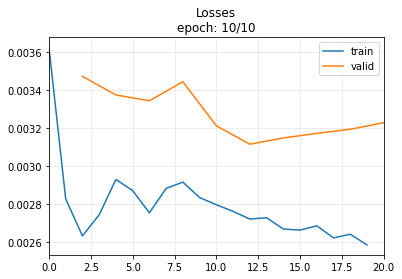

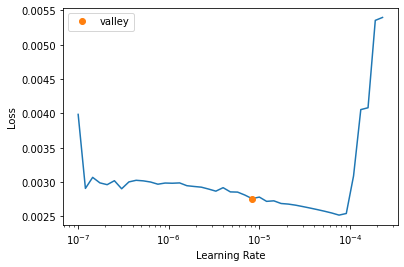

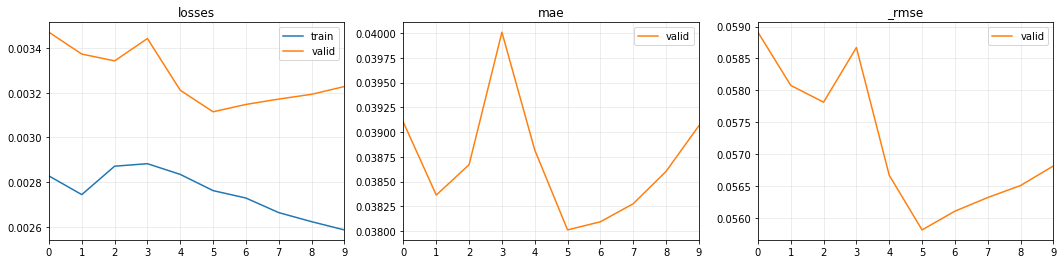

In [ ]:
tim.learn_rocket=tim.predict_ann(tim.x_covid19, tim.y_covid19, tim.split_covid19,mod=tsai.models.MINIROCKET_Pytorch.MiniRocket,xname="Covid-19",epoch=10)

>Side note: training is getting better while valid gets worst. It's a classic case of overfitting. 